In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

## Correctness Ablations on GrowPrompt and MemPrompt

In [9]:
agent_name = "claude"
data = json.loads(Path(f"ablations/correctness_{agent_name}.json").read_bytes())

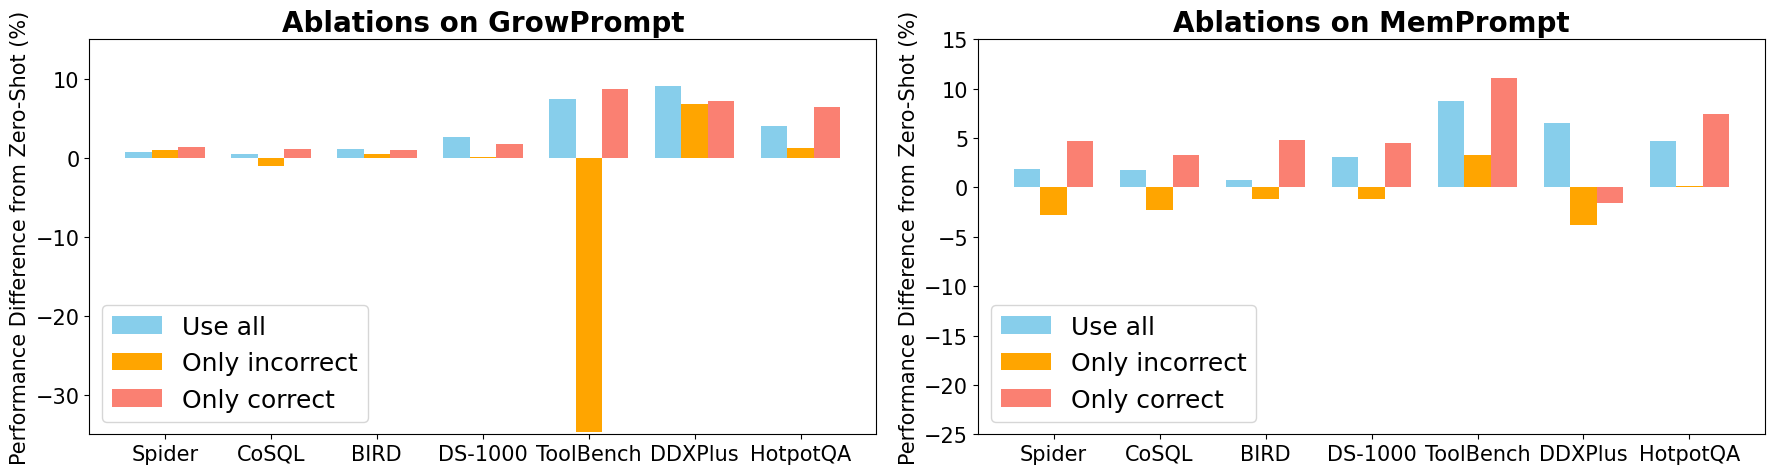

In [11]:
plt.rcParams.update({'font.size': 15})

# Function to rearrange data
def rearrange_data(data):
    growprompt_categories = [f"{dataset}\nGrowPrompt" for dataset in data]
    memprompt_categories = [f"{dataset}\nMemPrompt" for dataset in data]
    
    growprompt_use_all = [data[dataset]["GrowPrompt"]["Use all"] for dataset in data]
    memprompt_use_all = [data[dataset]["MemPrompt"]["Use all"] for dataset in data]
    
    growprompt_only_incorrect = [data[dataset]["GrowPrompt"]["Only incorrect"] for dataset in data]
    memprompt_only_incorrect = [data[dataset]["MemPrompt"]["Only incorrect"] for dataset in data]
    
    growprompt_only_correct = [data[dataset]["GrowPrompt"]["Only correct"] for dataset in data]
    memprompt_only_correct = [data[dataset]["MemPrompt"]["Only correct"] for dataset in data]

    return (growprompt_categories, growprompt_use_all, growprompt_only_incorrect, growprompt_only_correct), \
           (memprompt_categories, memprompt_use_all, memprompt_only_incorrect, memprompt_only_correct)

# Rearrange data
(growprompt_categories, growprompt_use_all, growprompt_only_incorrect, growprompt_only_correct), \
(memprompt_categories, memprompt_use_all, memprompt_only_incorrect, memprompt_only_correct) = rearrange_data(data)

x1 = np.arange(len(growprompt_categories))
x2 = np.arange(len(memprompt_categories))
width = 0.25

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Plot for GrowPrompt
rects1 = ax1.bar(x1 - width, growprompt_use_all, width, label='Use all', color='skyblue')
rects2 = ax1.bar(x1, growprompt_only_incorrect, width, label='Only incorrect', color='orange')
rects3 = ax1.bar(x1 + width, growprompt_only_correct, width, label='Only correct', color='salmon')

ax1.set_ylim(-35, +15)
ax1.set_ylabel('Performance Difference from Zero-Shot (%)')
ax1.set_title('Ablations on GrowPrompt', fontweight='bold', fontsize=20)
ax1.set_xticks(x1)
ax1.set_xticklabels([dataset for dataset in data], rotation=0, ha="center")
ax1.legend(loc="lower left", fontsize="large")

# Plot for MemPrompt
rects1 = ax2.bar(x2 - width, memprompt_use_all, width, label='Use all', color='skyblue')
rects2 = ax2.bar(x2, memprompt_only_incorrect, width, label='Only incorrect', color='orange')
rects3 = ax2.bar(x2 + width, memprompt_only_correct, width, label='Only correct', color='salmon')

ax2.set_ylim(-25, +15)
ax2.set_ylabel('Performance Difference from Zero-Shot (%)')
ax2.set_title('Ablations on MemPrompt', fontweight='bold', fontsize=20)
ax2.set_xticks(x2)
ax2.set_xticklabels([dataset for dataset in data], rotation=0, ha="center")
ax2.legend(loc="lower left", fontsize="large")

fig.tight_layout()

# Save the figure in high dpi
plt.savefig(f'correctness_ablations_{agent_name}.pdf', dpi=500, bbox_inches='tight')
plt.show()

## Robustness to Different Sequences

In [2]:
# Data
gemini_data = {
    "BIRD": {
        "avg": [28.16, 31.49, 21.71, 28.94, 30.00, 31.84, 36.04, 37.30],
        "ste": [0, 0, 0, 0, 0.39, 0.57, 0.90, 0.37]
    },
    "DS-1000": {
        "avg": [33.20, 29.40, 21.10, 32.80, 33.28, 34.00, 37.12, 42.04],
        "ste": [0, 0, 0, 0, 0.20, 0.47, 0.45, 0.39]
    },
    "ToolBench": {
        "avg": [61.73, 66.27, 58.40, 61.60, 63.63, 62.74, 72.03, 75.12],
        "ste": [0, 0, 0, 0, 0.57, 1.82, 1.37, 0.84]
    },
    "DDXPlus": {
        "avg": [50.57, 57.48, 59.30, 50.57, 50.43, 49.66, 70.44, 79.89],
        "ste": [0, 0, 0, 0, 0.35, 2.15, 0.33, 1.14]
    },
    "HotpotQA": {
        "avg": [49.47, 54.40, 49.67, 49.53, 53.25, 54.56, 56.60, 55.60],
        "ste": [0, 0, 0, 0, 0.16, 0.41, 0.21, 0.42]
    }
}
claude_data = {
    "BIRD": {
        "avg": [30.90, 30.77, 30.77, 29.99, 31.60, 32.50, 36.90, 37.30],
        "ste": [0, 0, 0, 0, 0.15, 0.47, 0.55, 0.37]
    },
    "DS-1000": {
        "avg": [38.40, 37.30, 23.90, 36.30, 40.16, 40.66, 44.06, 42.04],
        "ste": [0, 0, 0, 0, 0.24, 0.41, 0.66, 0.39]
    },
    "ToolBench": {
        "avg": [58.27, 69.33, 61.33, 55.87, 65.60, 65.41, 70.53, 75.12],
        "ste": [0, 0, 0, 0, 0.17, 0.91, 0.72, 0.84]
    },
    "DDXPlus": {
        "avg": [60.43, 71.15, 62.13, 60.43, 69.82, 69.41, 77.62, 79.89],
        "ste": [0, 0, 0, 0, 0.10, 0.76, 0.55, 1.14]
    },
    "HotpotQA": {
        "avg": [41.47, 50.00, 50.60, 41.00, 46.12, 47.03, 51.85, 55.60],
        "ste": [0 ,0, 0, 0, 0.30, 0.55, 0.25, 0.42]
    }
}
gpt_data = {
    "BIRD": {
        "avg": [29.75, 28.94, 29.21, 29.92, 30.08, 32.85, 34.98, 37.30],
        "ste": [0, 0, 0, 0, 0.33, 0.68, 0.68, 0.37]
    },
    "DS-1000": {
        "avg": [41.50, 33.30, 32.80, 39.80, 25.36, 28.50, 39.54, 42.04],
        "ste": [0, 0, 0, 0, 0.45, 1.43, 0.62, 0.39]
    },
    "ToolBench": {
        "avg": [64.13, 70.13, 57.20, 64.53, 67.92, 67.33, 74.11, 75.12],
        "ste": [0, 0, 0, 0, 0.41, 1.33, 0.86, 0.84]
    },
    "DDXPlus": {
        "avg": [47.56, 54.31, 53.18, 47.68, 44.47, 51.03, 64.89, 79.89],
        "ste": [0, 0, 0, 0, 0.50, 0.70, 1.06, 1.14]
    },
    "HotpotQA": {
        "avg": [54.53, 54.93, 57.13, 40.06, 55.52, 56.26, 56.12, 55.60],
        "ste": [0, 0, 0, 0, 0.25, 0.19, 0.14, 0.42]
    }
}

In [3]:
methods = ["Zero-Shot", "Few-Shot", "CoT", "Self-Refine", "GrowPrompt", "MemPrompt", "Self-StreamICL", "MAM-StreamICL"]
data = gpt_data
data_name = "gpt"

# Plot 1 x 5 bar subplots with error bars
plt.rcParams.update({'font.size': 18})
colors = ['lightblue', 'orange', 'red', 'lightcoral', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue']
non_streaming_styles = ['--', '--', '--', '--']
streaming_styles = ['-', '-', '-', '-']

fig, axes = plt.subplots(1, 5, figsize=(25, 4), sharey=False)

for figno, (ax, (dataset, stats)) in enumerate(zip(axes, data.items())):
    y_avg = stats['avg']
    y_ste = stats['ste']
    x = np.arange(len(methods))

    for i in range(len(methods)):
        if i < 4:
            ax.bar(x[i], y_avg[i], yerr=y_ste[i], capsize=5, color=colors[i], linestyle=non_streaming_styles[i], label=methods[i] if dataset == 'BIRD' else "")
        else:
            ax.bar(x[i], y_avg[i], yerr=y_ste[i], capsize=5, color=colors[i], linestyle=streaming_styles[i - 4], label=methods[i] if dataset == 'BIRD' else "")

    if figno == 0:
        ax.set_ylabel("Performance (%)")
    ax.set_title(dataset, fontweight='bold')
    ax.set_xticks(range(8))
    ax.set_xticklabels([''] * 8)
    ax.set_ylim(min(y_avg) - 10, max(y_avg) + max(y_ste) + 5)

fig.tight_layout()
fig.subplots_adjust(right=0.85)
fig.legend(methods, loc='lower center', ncol=8, bbox_to_anchor=(0.44, -0.10))
plt.savefig(f'robustness_{data_name}.pdf', dpi=500, bbox_inches='tight')
plt.show()

## MAM Ablations

In [8]:
methods = [
    # "Zero-Shot (GPT)",
    "Self-StreamICL (GPT)",
    "SAM-StreamICL (GPT)",
    # "Zero-Shot (Gemini)",
    "Self-StreamICL (Gemini)",
    "SAM-StreamICL (Gemini)",
    # "Zero-Shot (Claude)",
    "Self-StreamICL (Claude)",
    "SAM-StreamICL (Claude)",
    "MAM-StreamICL"]
data = {
    "DDXPlus": {
        "avg": [
            # 47.56,
            66.16,
            65.31,
            # 50.57,
            69.50,
            72.05,
            # 60.43,
            76.02,
            81.52,
            83.50
        ]
    }
}
colors = ["mediumseagreen", "seagreen", "skyblue", "deepskyblue", "darksalmon", "coral", "darkred"]

# Plot 1 x 5 bar subplots with error bars
plt.rcParams.update({'font.size': 15})
# colors = ['lightblue', 'orange', 'red', 'lightcoral', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue']
# non_streaming_styles = ['--', '--', '--', '--']
# streaming_styles = ['-', '-', '-', '-']

fig, axes = plt.subplots(1, 1, figsize=(10, 4), sharey=False)

# for figno, (ax, (dataset, stats)) in enumerate(zip(axes, data.items())):
ax = axes
dataset = "DDXPlus"
stats = data[dataset]
y_avg = stats['avg']
x = np.arange(len(methods))

for i in range(len(methods)):
    ax.bar(x[i], y_avg[i], capsize=5, label=methods[i], color=colors[i])

# if figno == 0:
ax.set_ylim(min(y_avg) - 10, max(y_avg) + 5)
ax.set_ylabel("Performance (%)")
ax.set_title(dataset, fontweight='bold')
ax.set_xticks(range(len(methods)))
ax.set_xticklabels([''] * len(methods))

fig.tight_layout()
fig.subplots_adjust(right=0.65)
fig.legend(methods, loc='center right')
plt.show()
# plt.savefig('robustness.png', dpi=500, bbox_inches='tight')